# Classification

## Definition



$X_{i\cdot} = (x_{i1},\ldots,x_{im})$ - single observation \
$X = (X_{1\cdot},\ldots,X_{n\cdot})^T = \begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ - dataset \
$C_1,\ldots,C_k$ - possible classes \
$P\left(C=C_i|X=x\right)=p_i$ - conditional probability / model \
$C = \operatorname{argmax}_{c\in\{C_1,\ldots,C_k\}}{P(c|X=x)}$ - predicted class

In [1]:
import numpy as np

In [2]:
X = np.random.randn(100, 2)
X

array([[ 2.70219359e+00,  1.84795789e-01],
       [-7.66289602e-01, -1.94942859e+00],
       [-1.63071493e+00, -7.23325371e-01],
       [ 1.89137671e+00, -3.00125195e-01],
       [ 8.48375584e-02, -1.23236699e+00],
       [-6.85450209e-01,  8.44727543e-01],
       [ 2.17487216e+00, -7.28811486e-01],
       [-1.03914028e-01, -4.31506142e-01],
       [ 1.10756014e-01, -4.81758110e-01],
       [-1.54354115e+00, -1.38893679e+00],
       [-9.45937339e-01,  6.31369082e-03],
       [-1.07731275e-04,  5.91910853e-01],
       [-2.78791260e-01, -6.48016427e-01],
       [-1.25659934e+00,  7.11646059e-01],
       [ 1.93229668e-01,  1.51867005e+00],
       [-7.28014224e-01, -4.81408825e-01],
       [-6.05483152e-01,  4.14032437e-02],
       [-1.15322180e-01,  8.27887721e-01],
       [-1.91425008e-01,  1.09712312e+00],
       [ 7.24894788e-01,  1.18062796e+00],
       [-1.02055385e+00, -9.03563894e-01],
       [ 4.12823682e-01,  5.14811604e-01],
       [ 2.91704229e-01, -1.21259692e-01],
       [-6.

In [3]:
noise = np.random.randn(100)
noise

array([ 0.91628342, -0.42398601, -1.82323943, -0.28017659,  1.10317081,
        0.42711884, -0.90822418, -0.13444039, -0.56666611,  0.63808298,
        0.47283626, -1.58981414, -0.65314693, -0.68602984, -0.83848641,
       -1.94970565,  1.78131077, -1.34388505,  1.08843862, -0.2239962 ,
        1.74103837,  0.93249244,  0.91162056,  0.85682243,  0.66211571,
       -0.75320135,  1.49298878, -1.45894864,  0.32912053, -0.22750323,
        1.24320529,  1.37660419, -0.11074407,  0.55727938,  0.95662228,
        0.46794024,  0.87609852,  0.30430295, -0.22228879, -0.08058837,
        2.04195051, -0.71337416,  1.49817783, -0.35981867,  1.20029393,
       -0.79154165, -0.15156573, -1.5844507 ,  0.06272594,  0.2339018 ,
       -0.36264453, -0.65519996, -1.34951619, -2.01844889,  0.45786655,
        1.35186179, -0.68476514,  0.36006513,  0.41725288, -0.31086644,
       -0.37102938, -1.27842484,  0.8057302 , -0.3078725 , -0.25967432,
        0.74199242, -0.00229639, -1.18067609,  0.47130117, -0.84

In [4]:
y = np.sum(X, axis=-1) + noise > 0
y = y.astype(int)
y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df.head()

x1        x2  y
0  2.702194  0.184796  1
1 -0.766290 -1.949429  0
2 -1.630715 -0.723325  0
3  1.891377 -0.300125  1
4  0.084838 -1.232367  0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

<AxesSubplot:xlabel='x1', ylabel='x2'>

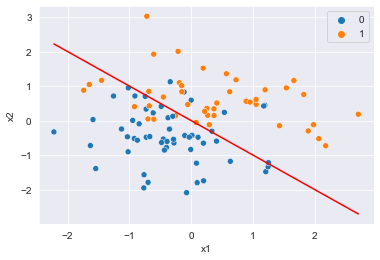

In [8]:
neg_df = df.copy()
neg_df['negx1'] = -neg_df.x1
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')

## Training and Test datasets

![](media\dataset.webp)

In [9]:
val_frac = .15
test_frac = .1
test = df.sample(frac = test_frac)
train = df.drop(test.index)
val = train.sample(frac = val_frac / (1 - test_frac))
train = train.drop(val.index)
train.shape, val.shape, test.shape

((75, 3), (15, 3), (10, 3))

In [10]:
def plot_data(data, name):
    neg_df = data.copy()
    neg_df['negx1'] = -neg_df.x1
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')
    plt.title(name)
    plt.show()

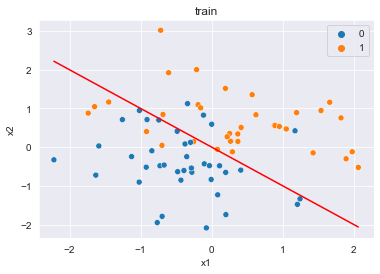

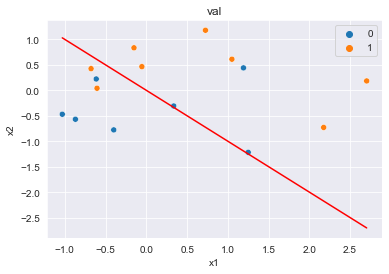

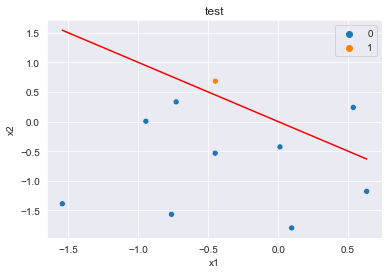

In [11]:
plot_data(train, 'train')
plot_data(val, 'val')
plot_data(test, 'test')

## Represetation

### Binary

$c\in\left\{C_1,C_2\right\}\Rightarrow \tilde{C_1}=0,\:\tilde{C_2}=1$ \
$\hat{p}=P(c=C_2|X=x)$ \
$\hat{c}=\begin{cases}C_1,&\hat{p}\le\frac{1}{2}\\C_2,&\hat{p}>\frac{1}{2}&\end{cases}$

### Multiclass

$c\in\{C_1,\ldots,C_k\}\Rightarrow \tilde{C_1}=(1,0,\ldots,0),\:\tilde{C_2}=(0,1,\ldots,0),\:\ldots,\:\tilde{C_k}=(0,0,\ldots,1)$ - one hot encoding \
$\hat{p_i}=P(c=C_i|X=x)$ \
$\hat{p}=(p_1,p_2,\ldots,p_k)$ \
$\hat{I}=\operatorname{argmax}_{i\in\{1,\ldots,k\}}{p_i}$ \
$\hat{c}=C_{\hat{I}}$

## scikit-learn
[![](media\sklearn.png)](https://scikit-learn.org/stable/)

In [12]:
!pip install scikit-learn

## Algorithms

![](media\classifiers.png)

In [13]:
train_x, train_y = train[['x1', 'x2']], train['y']
val_x, val_y = val[['x1', 'x2']], val['y']
test_x, test_y = test[['x1', 'x2']], test['y']

### Logistic Regression

$$\forall_{i\in\{1,\ldots,n\}}\:p_i=\frac{1}{1+e^{-\left(\beta_0+\beta_1x_i1+\ldots+\beta_mx_{im}\right)}}=\frac{1}{1+e^{-X_{i\cdot}\beta}}$$
$X=\begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ \
$\beta=(\beta_0,\ldots,\beta_m)^T$
![](media\logistic_regression.png)

$y_i\in\{0,1\}$ - real "class" of ith observation \
$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}$ - loss function \
$\hat{\beta}=\operatorname{argmin}_{\beta}{L}$

#### How to minimize the LOSS?
#### Gradient Descent!
![](media\gradient_descent.png)
More about Gradient Descent next time

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_model = LogisticRegression(penalty='none')
logistic_model.fit(train_x, train_y)

LogisticRegression(penalty='none')

In [16]:
def model_plane(model, points=100):
    
    x = np.array(train_x)
    x1 = np.array([np.linspace(min(x[:, 0]), max(x[:, 0]), points) for _ in range(points)]).flatten()
    x2 = np.array([np.linspace(min(x[:, 1]), max(x[:, 1]), points) for _ in range(points)]).T.flatten()
    y = model.predict_proba(np.stack((x1, x2)).T)
    sns.scatterplot(x=x1, y=x2, hue=y[:, 1])
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=np.array(train_y))

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


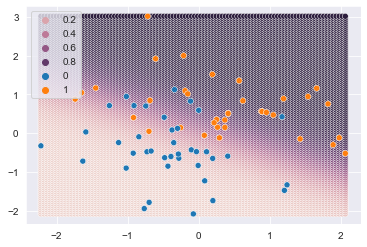

In [17]:
model_plane(logistic_model)

In [18]:
logistic_model.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0])

In [19]:
logistic_model.score(val_x, val_y)

0.8

In [20]:
logistic_model.score(test_x, test_y)

0.9

### Regularized logistic regression
$$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}+\alpha\|\beta\|_l$$

In [21]:
regularized_model = LogisticRegression(penalty='l2', C=.1)
regularized_model.fit(train_x, train_y)

LogisticRegression(C=0.1)

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


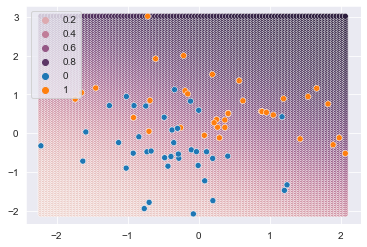

In [22]:
model_plane(regularized_model)

In [23]:
regularized_model.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0])

In [24]:
regularized_model.score(val_x, val_y)

0.8

In [25]:
regularized_model.score(test_x, test_y)

0.9

<AxesSubplot:>

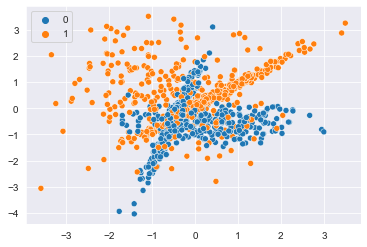

In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, class_sep=.5, random_state=42)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=.8)

In [28]:
regularized_model = LogisticRegression(penalty='l2', C=.1)
regularized_model.fit(train_x, train_y)

LogisticRegression(C=0.1)

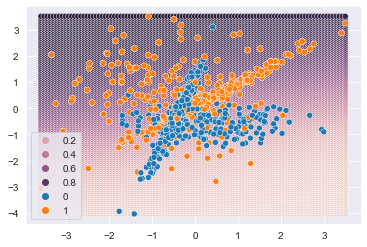

In [29]:
model_plane(regularized_model)

In [30]:
regularized_model.score(test_x, test_y)

0.84

## K-Nearest Neighbours

$x$ - data to be predicted
$d_i = \|x-X_{i\cdot}\|$ - distance from observed data \
$c_i=y_i|d_{i:n}$ - ith nearest class \
$NN=(c_1,\ldots,c_k)$ - nearest neighbours \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}{\sum_i^k{1_{c_i=k}}}$ \
![](media\knn.png)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

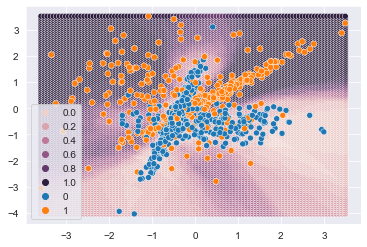

In [33]:
model_plane(knn)

In [34]:
knn.score(test_x, test_y)

0.835

### Support Vector Machine

![](media\svm.webp)
$w^TX_{i\cdot}-b=0$ - decision boundary \
$y_i\in\{-1,1\}$ \
$y_i(w^TX_{i\cdot}-b)\ge1$ - constraint
$w=\operatorname{argmax}_{w^{*}}{\frac{2}{\left\|w^{*}\right\|}}$ - margin size

### Soft margins
$$L=\lambda\|w\|^2+\frac{1}{n}\sum_i^n{\max{\left(0,1-y_i\left(w^TX_{i\cdot}-b\right)\right)}}$$
$w=\operatorname{argmin}_{w^{*}}{L}$

In [35]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=.01, probability=True)
svm.fit(train_x, train_y)

SVC(C=0.01, kernel='linear', probability=True)

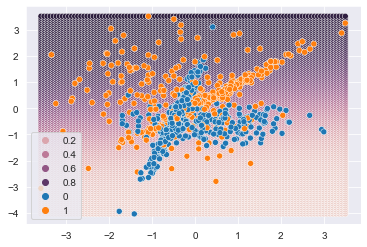

In [36]:
model_plane(svm)

In [37]:
svm.score(test_x, test_y)

0.845

### Kernel trick
![](media\kernel.ppm)
$k(X_{i\cdot},X_{j\cdot})=\phi(X_{i\cdot})\phi(X_{j\cdot})$ - kernel \
$w=\sum_i^n{c_iy_i\phi(X_{i\cdot})}$

![](media\kernels_formula.png)
![](media\kernels_plot.png)

In [38]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=1, C=100, probability=True)
rbf_svm.fit(train_x, train_y)

SVC(C=100, gamma=1, probability=True)

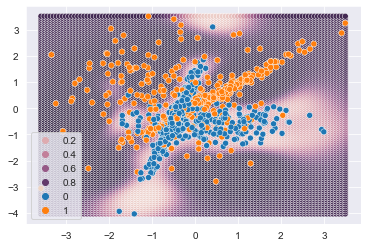

In [39]:
model_plane(rbf_svm)

In [40]:
rbf_svm.score(test_x, test_y)

0.89

## Decision Trees

![](media\decision_tree.png)

$R_p$ - parent node \
$R_l,R_r$ - left and right nodes \
$S:R_p\rightarrow \{R_l,R_r\}$ - split \
$p_i^{(a)}=P(c=C_i|X\in R_a)$ - probability of ith class in $R_a$ node \
$G(R_a)=1-\sum_i^K{\left(p_i^{(a)}\right)^2}$ - Gini Impurity \
$E(R_a)=-\sum_i^K{p_i\log{p_i}}$ - Entropy \
$IG(S)=f(R_p)-\left(P(R_l)f(R_l)+P(R_r)f(R_p)\right);\: f(x)=G(x)\lor f(x)=E(x)$ - Information Gain \
$S=\operatorname{argmax}_{S^{*}}IG\left(S^{*}\right)$

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

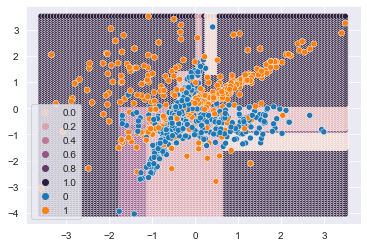

In [42]:
model_plane(decision_tree)

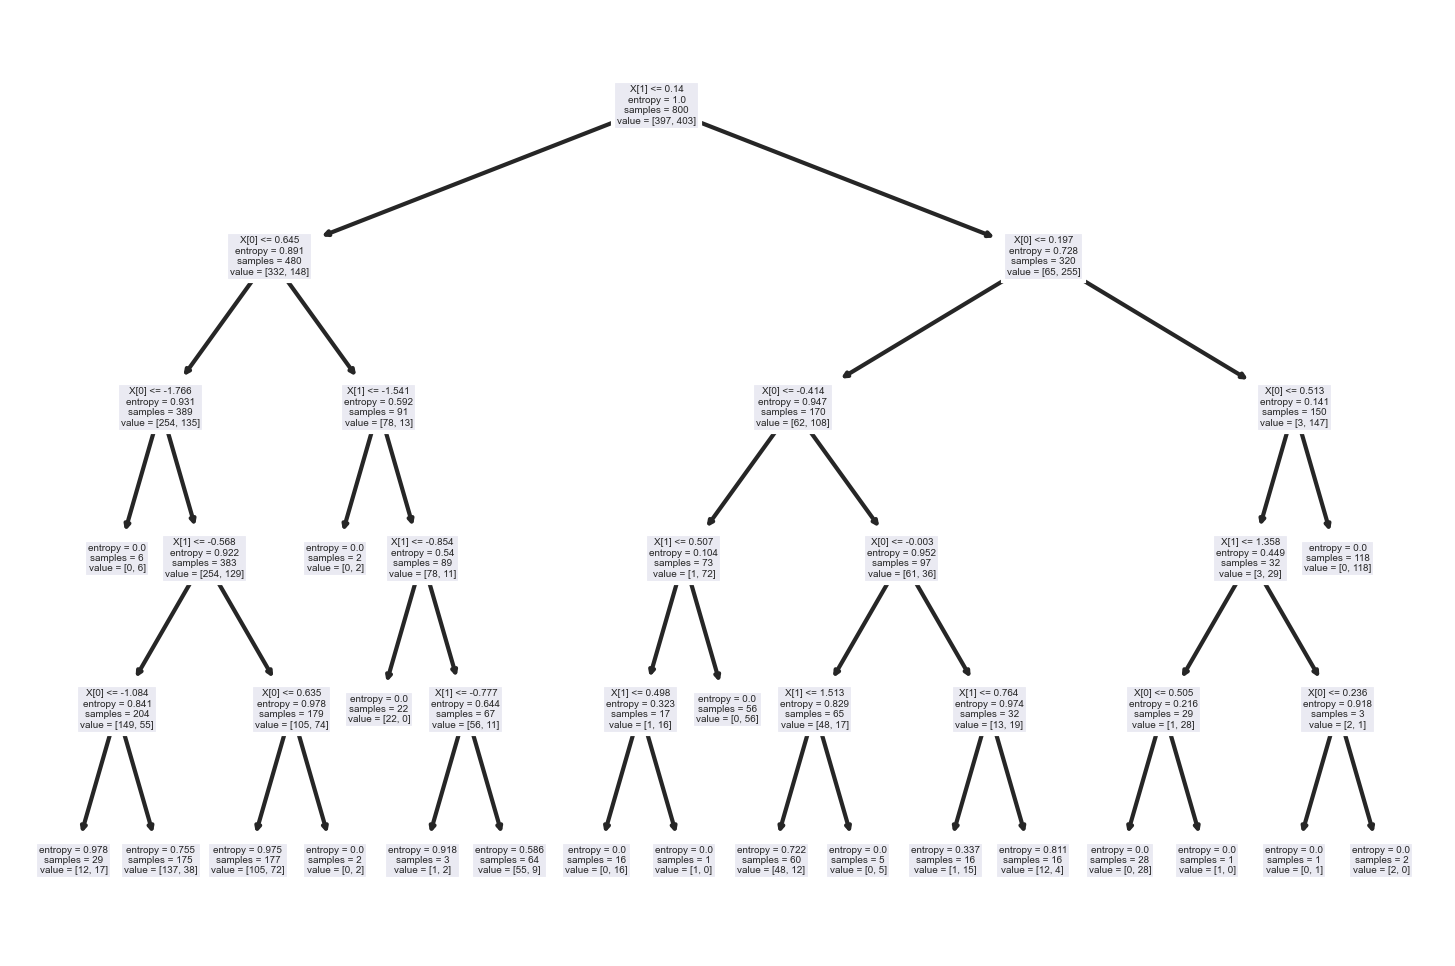

In [43]:
fig, axes = plt.subplots(dpi=300)
plot_tree(decision_tree)
plt.show()

In [44]:
decision_tree.score(test_x, test_y)

0.82

## Naive Bayes
![](media\bayes.png)
$$P(c=C_i|X=x)=\frac{P(c=C_i,X=x)}{P(X)}\propto P(c=C_i,X=x)=\\=P(c=C_i)P(X_{\cdot 1}=x_1,\ldots X_{\cdot m}=x_m|c=C_i)P(X_{\cdot 1}=x_1|X_{\cdot 2},\ldots,X_{\cdot m}=x_m,c=C_i)\ldots P(X_{\cdot m}=x_m|c=C_i)$$

$$P(X_{\cdot j}=x_j|X_{\cdot -j}=x_{-j},c=C_i)=P(X_{\cdot j}=x_j|c=C_i)$$

$$P(c=C_i|X=x)=P(c=C_i)\prod_{j=1}^m{P(X_{\cdot j}=x_j|c=C_i)}$$

In dependence of data type, different likelihood functions are applied

### Gaussian (continous variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

### Bernoulli (binary variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b23b8affe1fa31b1ce499d5d2944d9763ff2e6e)

### Multinomial (categorical variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

In [45]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(train_x, train_y)

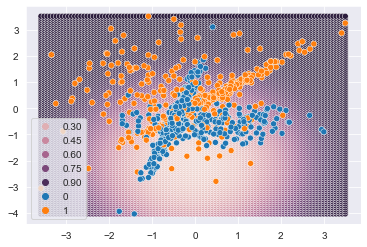

In [46]:
model_plane(bayes)

In [47]:
bayes.score(test_x, test_y)

0.78

### Probability Calibration
[![](media\calibration.png)](https://scikit-learn.org/stable/modules/calibration.html)

### Others
[Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html) \
[LDA/QDA](https://scikit-learn.org/stable/modules/lda_qda.html)

## Metrics
![](media\confusion_matrix.jpeg) \
$F_{\beta}=\left(1+\beta^2\right)\frac{\operatorname{precision}\cdot\operatorname{recall}}{\beta^2\operatorname{precision}+\operatorname{recall}}$ \
$F_1=2\frac{\operatorname{precision}\cdot\operatorname{recall}}{\operatorname{precision}+\operatorname{recall}}$

## Multiclassification as binary

#### OvO
$P^{(i,j)}(c=C_i|X=x)=1-P^{(i,j)}(c=C_j|X=x)\:\forall_{i\neq j}$ - $\frac{K(K-1)}{2}$ models \
$\hat{c}^{(i,j)}=\begin{cases}C_j,&P^{(i,j)}(c=C_i|X=x)\le\frac{1}{2}\\C_i,&P^{(i,j)}(c=C_i|X=x)>\frac{1}{2}\end{cases}$ \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}\sum_{i\neq j}{1_{\hat{c}^{(i,j)}=C_k}}$
![](media\ovo.png)

#### OvR
$P^{(i)}(c=C_i|X=x)=1-P^{(i)}(c\neq C_i|X=x)\:\forall_{i\in\{1,\ldots,K\}}$ - $K$ models \
$\hat{c}=\operatorname{argmax}_{i\in\{1,\ldots,K\}}{P^{(i)}(c=C_i|X=x)}$
![](media\ovr.png)

## Multiclass

In [48]:
def predict_plane(X, y_true, model, points=100):
    
    x1 = np.array([np.linspace(min(X[:, 0]), max(X[:, 0]), points) for _ in range(points)]).flatten()
    x2 = np.array([np.linspace(min(X[:, 1]), max(X[:, 1]), points) for _ in range(points)]).T.flatten()
    y = model.predict(np.stack((x1, x2)).T)
    sns.scatterplot(x=x1, y=x2, hue=y)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true)

In [49]:
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1,
                           n_features=2, n_redundant=0, n_repeated=0, weights=[.22, .33, .44])

<AxesSubplot:>

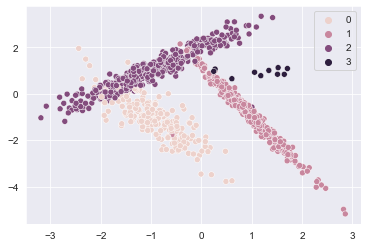

In [50]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [51]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [52]:
ovo = OneVsOneClassifier(LogisticRegression()).fit(X, y)

In [53]:
ovo.score(X, y)

0.919

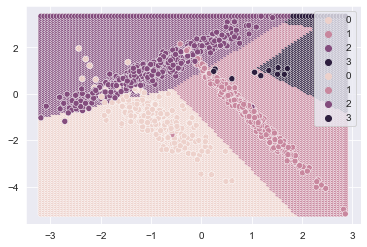

In [54]:
predict_plane(X, y, ovo)

In [55]:
ovr = OneVsRestClassifier(LogisticRegression()).fit(X, y)

In [56]:
ovr.score(X, y)

0.897

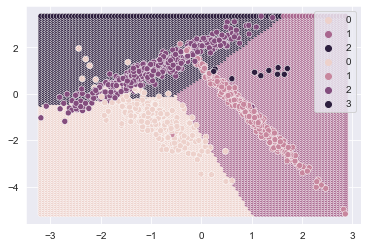

In [57]:
predict_plane(X, y, ovr)

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
(precision_score(ovr.predict(X), y, average='macro'),
 recall_score(ovr.predict(X), y, average='macro'),
 f1_score(ovr.predict(X), y, average='macro'))

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6671547077213971, 0.6764248749905406, 0.6703957758369785)

In [59]:
confusion_matrix(ovr.predict(X), y)

array([[173,   1,  20,   0],
       [  4, 306,   1,  11],
       [ 43,  22, 418,   1],
       [  0,   0,   0,   0]], dtype=int64)

In [60]:
balanced = LogisticRegression(multi_class='ovr', class_weight='balanced').fit(X, y)

In [61]:
balanced.score(X, y)

0.871

In [62]:
(precision_score(balanced.predict(X), y, average='macro'),
 recall_score(balanced.predict(X), y, average='macro'),
 f1_score(balanced.predict(X), y, average='macro'))

(0.7002326239246464, 0.6831129357836747, 0.6873026550239762)

In [63]:
confusion_matrix(balanced.predict(X), y)

array([[189,   1,  47,   0],
       [  1, 297,   1,   9],
       [ 29,  17, 383,   1],
       [  1,  14,   8,   2]], dtype=int64)

## ROC/AUC

In [64]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

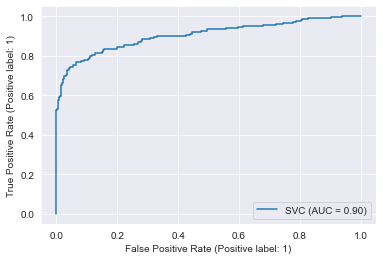

In [65]:
RocCurveDisplay.from_estimator(rbf_svm, train_x, train_y)

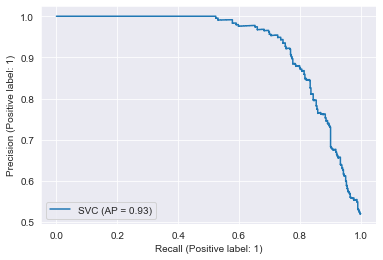

In [66]:
PrecisionRecallDisplay.from_estimator(rbf_svm, train_x, train_y)

# Classification

## Definition



$X_{i\cdot} = (x_{i1},\ldots,x_{im})$ - single observation \
$X = (X_{1\cdot},\ldots,X_{n\cdot})^T = \begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ - dataset \
$C_1,\ldots,C_k$ - possible classes \
$P\left(C=C_i|X=x\right)=p_i$ - conditional probability / model \
$C = \operatorname{argmax}_{c\in\{C_1,\ldots,C_k\}}{P(c|X=x)}$ - predicted class

In [67]:
import numpy as np

In [68]:
X = np.random.randn(100, 2)
X

array([[ 0.46921709, -0.78201151],
       [ 0.91355596, -0.00397218],
       [-1.20689716, -0.04743958],
       [-1.23120588, -1.26771824],
       [-0.08933873, -0.44523393],
       [ 0.54531312,  0.47194534],
       [-2.62820751, -1.04299033],
       [ 0.13551346, -0.58072285],
       [-0.65239863,  0.0498906 ],
       [-1.12403157,  0.44034848],
       [ 1.80280336,  1.24966686],
       [ 1.00587411,  0.47930945],
       [-1.36085003, -0.73954602],
       [-1.52534657, -1.01571873],
       [ 0.09718914, -0.58095946],
       [ 0.71228493, -0.46652542],
       [ 0.3584153 ,  1.91045262],
       [-0.40133409,  1.20745994],
       [ 0.98589607,  0.91937453],
       [-1.1904942 ,  1.06271228],
       [-0.92609768,  0.55211121],
       [ 0.92264677, -0.34526135],
       [ 0.96009084,  0.19654104],
       [-0.6643206 , -0.32423034],
       [ 0.05990295, -0.60291134],
       [-0.66622716,  0.48786042],
       [ 0.54577252, -0.08047695],
       [-1.10772286, -0.67604131],
       [ 0.16960783,

In [69]:
noise = np.random.randn(100)
noise

array([ 2.34150554, -1.09405789, -0.81058501, -1.94469685, -0.03081099,
        0.09712866, -1.65335576,  1.66793961,  0.49498994,  0.56741607,
       -0.84082505,  0.7330009 , -1.53818973, -0.06845786, -0.01945745,
        0.43351417,  0.08254244, -2.12621184,  1.28182179, -0.91623317,
        0.31337686, -0.3145826 ,  0.32860332,  0.31293319,  0.17062848,
        1.45690693,  0.00793055,  1.07901059,  0.42532579,  0.47401036,
       -1.40476867,  0.4567794 ,  2.40806405, -0.48713369, -0.25259945,
        0.3497654 , -0.15008715,  0.85986663, -0.49511799, -0.74580804,
        1.63533242, -1.22455945,  0.21154788, -0.18881684, -1.02616099,
        0.67863921, -0.31357836, -1.02209156,  0.30348215, -0.44776416,
        1.9464279 ,  1.00966477, -1.28517618,  4.06959463,  0.3682448 ,
        0.84509953,  0.30923994,  0.1362825 ,  0.24736745,  0.57495744,
        1.18884292,  2.04439588, -0.63680954, -0.34345465, -0.06584488,
       -0.45953637, -0.74011653,  1.00962873, -0.84643794,  0.35

In [70]:
y = np.sum(X, axis=-1) + noise > 0
y = y.astype(int)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [71]:
import pandas as pd

In [72]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df.head()

x1        x2  y
0  0.469217 -0.782012  1
1  0.913556 -0.003972  0
2 -1.206897 -0.047440  0
3 -1.231206 -1.267718  0
4 -0.089339 -0.445234  0

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

<AxesSubplot:xlabel='x1', ylabel='x2'>

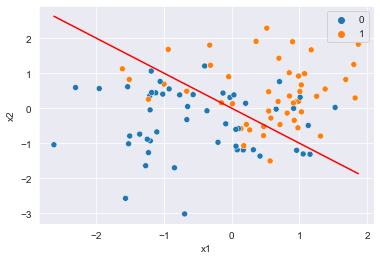

In [74]:
neg_df = df.copy()
neg_df['negx1'] = -neg_df.x1
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')

## Training and Test datasets

![](media\dataset.webp)

In [75]:
val_frac = .15
test_frac = .1
test = df.sample(frac = test_frac)
train = df.drop(test.index)
val = train.sample(frac = val_frac / (1 - test_frac))
train = train.drop(val.index)
train.shape, val.shape, test.shape

((75, 3), (15, 3), (10, 3))

In [76]:
def plot_data(data, name):
    neg_df = data.copy()
    neg_df['negx1'] = -neg_df.x1
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')
    plt.title(name)
    plt.show()

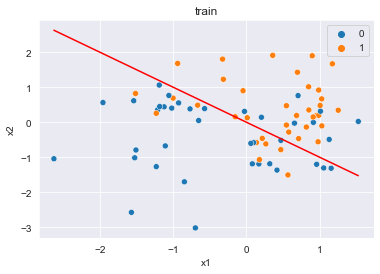

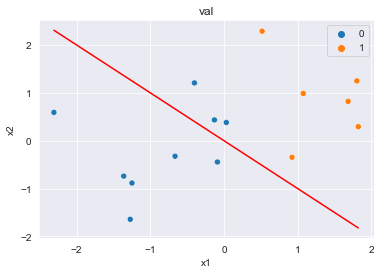

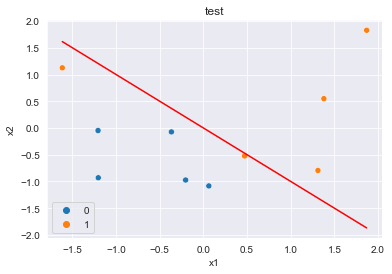

In [77]:
plot_data(train, 'train')
plot_data(val, 'val')
plot_data(test, 'test')

## Represetation

### Binary

$c\in\left\{C_1,C_2\right\}\Rightarrow \tilde{C_1}=0,\:\tilde{C_2}=1$ \
$\hat{p}=P(c=C_2|X=x)$ \
$\hat{c}=\begin{cases}C_1,&\hat{p}\le\frac{1}{2}\\C_2,&\hat{p}>\frac{1}{2}&\end{cases}$

### Multiclass

$c\in\{C_1,\ldots,C_k\}\Rightarrow \tilde{C_1}=(1,0,\ldots,0),\:\tilde{C_2}=(0,1,\ldots,0),\:\ldots,\:\tilde{C_k}=(0,0,\ldots,1)$ - one hot encoding \
$\hat{p_i}=P(c=C_i|X=x)$ \
$\hat{p}=(p_1,p_2,\ldots,p_k)$ \
$\hat{I}=\operatorname{argmax}_{i\in\{1,\ldots,k\}}{p_i}$ \
$\hat{c}=C_{\hat{I}}$

### Multiclassification as binary

#### OvO
$P^{(i,j)}(c=C_i|X=x)=1-P^{(i,j)}(c=C_j|X=x)\:\forall_{i\neq j}$ - $\frac{K(K-1)}{2}$ models \
$\hat{c}^{(i,j)}=\begin{cases}C_j,&P^{(i,j)}(c=C_i|X=x)\le\frac{1}{2}\\C_i,&P^{(i,j)}(c=C_i|X=x)>\frac{1}{2}\end{cases}$ \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}\sum_{i\neq j}{1_{\hat{c}^{(i,j)}=C_k}}$
![](media\ovo.png)

#### OvR
$P^{(i)}(c=C_i|X=x)=1-P^{(i)}(c\neq C_i|X=x)\:\forall_{i\in\{1,\ldots,K\}}$ - $K$ models \
$\hat{c}=\operatorname{argmax}_{i\in\{1,\ldots,K\}}{P^{(i)}(c=C_i|X=x)}$
![](media\ovr.png)

## scikit-learn
[![](media\sklearn.png)](https://scikit-learn.org/stable/)

In [78]:
!pip install scikit-learn

## Algorithms

![](media\classifiers.png)

In [79]:
train_x, train_y = train[['x1', 'x2']], train['y']
val_x, val_y = val[['x1', 'x2']], val['y']
test_x, test_y = test[['x1', 'x2']], test['y']

### Logistic Regression

$$\forall_{i\in\{1,\ldots,n\}}\:p_i=\frac{1}{1+e^{-\left(\beta_0+\beta_1x_i1+\ldots+\beta_mx_{im}\right)}}=\frac{1}{1+e^{-X_{i\cdot}\beta}}$$
$X=\begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ \
$\beta=(\beta_0,\ldots,\beta_m)^T$
![](media\logistic_regression.png)

$y_i\in\{0,1\}$ - real "class" of ith observation \
$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}$ - loss function \
$\hat{\beta}=\operatorname{argmin}_{\beta}{L}$

#### How to minimize the LOSS?
#### Gradient Descent!
![](media\gradient_descent.png)
More about Gradient Descent next time

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logistic_model = LogisticRegression(penalty='none')
logistic_model.fit(train_x, train_y)

LogisticRegression(penalty='none')

In [82]:
def model_plane(model, points=100):
    
    x = np.array(train_x)
    x1 = np.array([np.linspace(min(x[:, 0]), max(x[:, 0]), points) for _ in range(points)]).flatten()
    x2 = np.array([np.linspace(min(x[:, 1]), max(x[:, 1]), points) for _ in range(points)]).T.flatten()
    y = model.predict_proba(np.stack((x1, x2)).T)
    sns.scatterplot(x=x1, y=x2, hue=y[:, 1])
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=np.array(train_y))

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


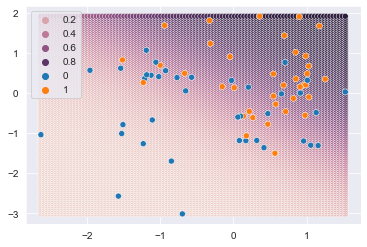

In [83]:
model_plane(logistic_model)

In [84]:
logistic_model.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0])

In [85]:
logistic_model.score(val_x, val_y)

0.8

In [86]:
logistic_model.score(test_x, test_y)

0.8

### Regularized logistic regression
$$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}+\alpha\|\beta\|_l$$

In [87]:
regularized_model = LogisticRegression(penalty='l2', C=.1)
regularized_model.fit(train_x, train_y)

LogisticRegression(C=0.1)

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


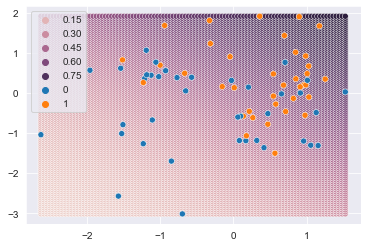

In [88]:
model_plane(regularized_model)

In [89]:
regularized_model.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0])

In [90]:
regularized_model.score(val_x, val_y)

0.8

In [91]:
regularized_model.score(test_x, test_y)

0.8

<AxesSubplot:>

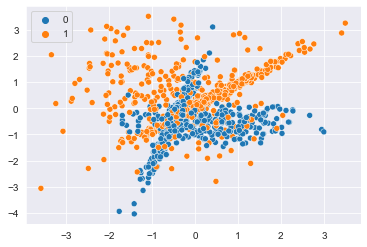

In [92]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, class_sep=.5, random_state=42)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [93]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=.8)

In [94]:
regularized_model = LogisticRegression(penalty='l2', C=.1)
regularized_model.fit(train_x, train_y)

LogisticRegression(C=0.1)

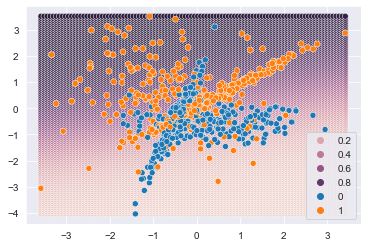

In [95]:
model_plane(regularized_model)

In [96]:
regularized_model.score(test_x, test_y)

0.72

## K-Nearest Neighbours

$x$ - data to be predicted
$d_i = \|x-X_{i\cdot}\|$ - distance from observed data \
$c_i=y_i|d_{i:n}$ - ith nearest class \
$NN=(c_1,\ldots,c_k)$ - nearest neighbours \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}{\sum_i^k{1_{c_i=k}}}$ \
![](media\knn.png)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

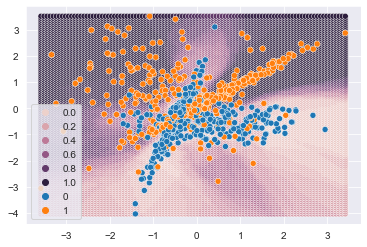

In [99]:
model_plane(knn)

In [100]:
knn.score(test_x, test_y)

0.82

### Support Vector Machine

![](media\svm.webp)
$w^TX_{i\cdot}-b=0$ - decision boundary \
$y_i\in\{-1,1\}$ \
$y_i(w^TX_{i\cdot}-b)\ge1$ - constraint
$w=\operatorname{argmax}_{w^{*}}{\frac{2}{\left\|w^{*}\right\|}}$ - margin size

### Soft margins
$$L=\lambda\|w\|^2+\frac{1}{n}\sum_i^n{\max{\left(0,1-y_i\left(w^TX_{i\cdot}-b\right)\right)}}$$
$w=\operatorname{argmin}_{w^{*}}{L}$

In [101]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=.01, probability=True)
svm.fit(train_x, train_y)

SVC(C=0.01, kernel='linear', probability=True)

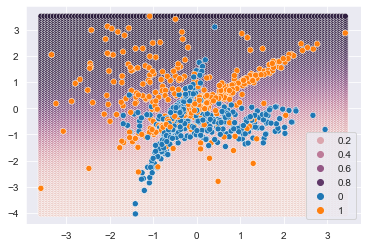

In [102]:
model_plane(svm)

In [103]:
svm.score(test_x, test_y)

0.74

### Kernel trick
![](media\kernel.ppm)
$k(X_{i\cdot},X_{j\cdot})=\phi(X_{i\cdot})\phi(X_{j\cdot})$ - kernel \
$w=\sum_i^n{c_iy_i\phi(X_{i\cdot})}$

![](media\kernels_formula.png)
![](media\kernels_plot.png)

In [104]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=1, C=100, probability=True)
rbf_svm.fit(train_x, train_y)

SVC(C=100, gamma=1, probability=True)

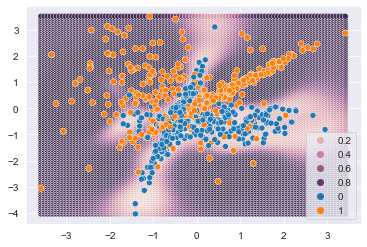

In [105]:
model_plane(rbf_svm)

In [106]:
rbf_svm.score(test_x, test_y)

0.835

## Decision Trees

![](media\decision_tree.png)

$R_p$ - parent node \
$R_l,R_r$ - left and right nodes \
$S:R_p\rightarrow \{R_l,R_r\}$ - split \
$p_i^{(a)}=P(c=C_i|X\in R_a)$ - probability of ith class in $R_a$ node \
$G(R_a)=1-\sum_i^K{\left(p_i^{(a)}\right)^2}$ - Gini Impurity \
$E(R_a)=-\sum_i^K{p_i\log{p_i}}$ - Entropy \
$IG(S)=f(R_p)-\left(P(R_l)f(R_l)+P(R_r)f(R_p)\right);\: f(x)=G(x)\lor f(x)=E(x)$ - Information Gain \
$S=\operatorname{argmax}_{S^{*}}IG\left(S^{*}\right)$

In [107]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

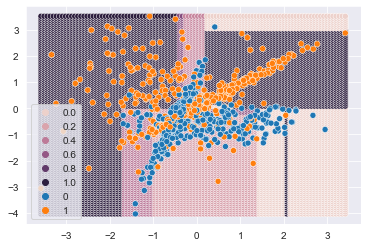

In [108]:
model_plane(decision_tree)

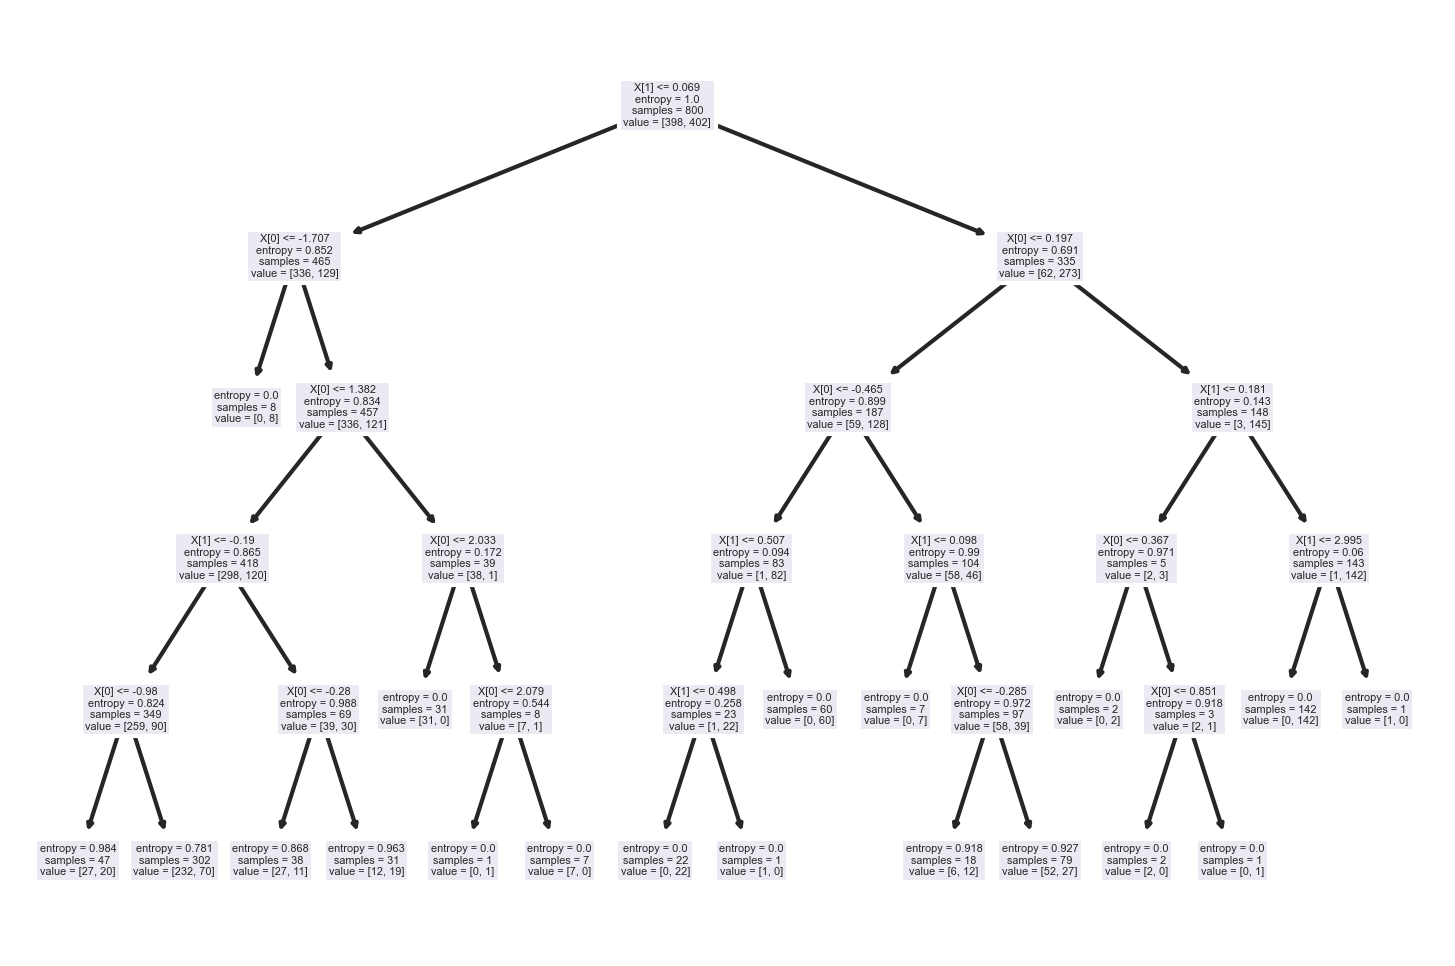

In [109]:
fig, axes = plt.subplots(dpi=300)
plot_tree(decision_tree)
plt.show()

In [110]:
decision_tree.score(test_x, test_y)

0.75

## Naive Bayes
![](media\bayes.png)
$$P(c=C_i|X=x)=\frac{P(c=C_i,X=x)}{P(X)}\propto P(c=C_i,X=x)=\\=P(c=C_i)P(X_{\cdot 1}=x_1,\ldots X_{\cdot m}=x_m|c=C_i)P(X_{\cdot 1}=x_1|X_{\cdot 2},\ldots,X_{\cdot m}=x_m,c=C_i)\ldots P(X_{\cdot m}=x_m|c=C_i)$$

$$P(X_{\cdot j}=x_j|X_{\cdot -j}=x_{-j},c=C_i)=P(X_{\cdot j}=x_j|c=C_i)$$

$$P(c=C_i|X=x)=P(c=C_i)\prod_{j=1}^m{P(X_{\cdot j}=x_j|c=C_i)}$$

In dependence of data type, different likelihood functions are applied

### Gaussian (continous variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

### Bernoulli (binary variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b23b8affe1fa31b1ce499d5d2944d9763ff2e6e)

### Multinomial (categorical variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

In [111]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(train_x, train_y)

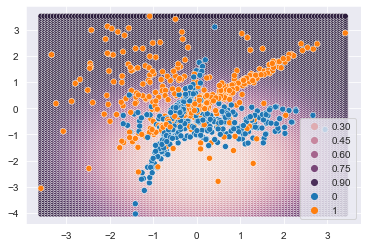

In [112]:
model_plane(bayes)

In [113]:
bayes.score(test_x, test_y)

0.705

### Probability Calibration
[![](media\calibration.png)](https://scikit-learn.org/stable/modules/calibration.html)

### Others
[Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html) \
[LDA/QDA](https://scikit-learn.org/stable/modules/lda_qda.html)

## Metrics
![](media\confusion_matrix.jpeg) \
$F_{\beta}=\left(1+\beta^2\right)\frac{\operatorname{precision}\cdot\operatorname{recall}}{\beta^2\operatorname{precision}+\operatorname{recall}}$ \
$F_1=2\frac{\operatorname{precision}\cdot\operatorname{recall}}{\operatorname{precision}+\operatorname{recall}}$

In [114]:
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1,
                           n_features=2, n_redundant=0, n_repeated=0, weights=[.22, .33, .44])

<AxesSubplot:>

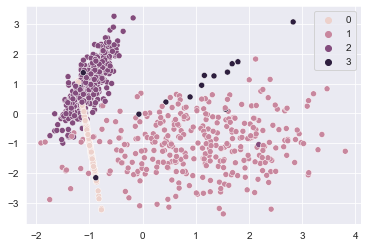

In [115]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [116]:
logistic = LogisticRegression().fit(X, y)

In [117]:
logistic.score(X, y)

0.908

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
(precision_score(logistic.predict(X), y, average='macro'),
 recall_score(logistic.predict(X), y, average='macro'),
 f1_score(logistic.predict(X), y, average='macro'))

(0.6969611532185339, 0.9247494083037382, 0.7071442256137069)

In [119]:
confusion_matrix(logistic.predict(X), y)

array([[184,  21,  16,   2],
       [  0, 305,   1,  10],
       [ 35,   4, 418,   3],
       [  0,   0,   0,   1]], dtype=int64)

In [120]:
balanced = LogisticRegression(class_weight='balanced').fit(X, y)

In [121]:
balanced.score(X, y)

0.86

In [122]:
(precision_score(balanced.predict(X), y, average='macro'),
 recall_score(balanced.predict(X), y, average='macro'),
 f1_score(balanced.predict(X), y, average='macro'))

(0.8046808126136185, 0.7158370286249911, 0.7297722272004992)

In [123]:
confusion_matrix(balanced.predict(X), y)

array([[196,  25,  45,   2],
       [  1, 267,   1,   1],
       [ 22,   2, 387,   3],
       [  0,  36,   2,  10]], dtype=int64)

## ROC/AUC

In [124]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

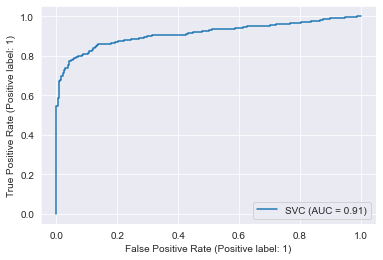

In [125]:
RocCurveDisplay.from_estimator(rbf_svm, train_x, train_y)

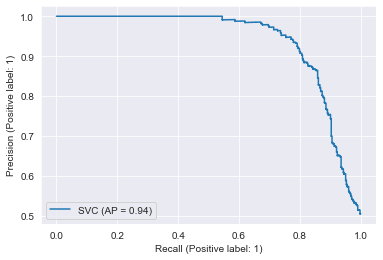

In [126]:
PrecisionRecallDisplay.from_estimator(rbf_svm, train_x, train_y)